In [4]:
# Initialize counters for 'Safe' and 'Risky' choices
from pyibl import Agent
import time
import random

b= Agent(name="My Agent")
b.default_utility = 5

options = ['Safe','Risky']
choice = b.choose(options)

total_counts_A = 0
total_counts_B = 0
participants = 100
trials = 100

for r in range(participants):
    rmax = []
    smax=[]
    ttime = [0]
    b.reset()
    
    for i in range(trials):
        start = time.time()
       
        choice = b.choose(["Safe", "Risky"])
        
        if choice == "Safe":
            b.respond(3)
            total_counts_A += 1
        elif random.random() <= 0.8:
            b.respond(4)
            total_counts_B += 1
        else:
            b.respond(0)
            total_counts_B += 1
        # Store the instance
        end = time.time()
        ttime.append(ttime[-1] + end - start)
        
        # Count the occurrences of 'Safe' and 'Risky' choices
       
        
        rmax.append(choice == 'Risky')
        smax.append(choice=='Safe')
        # Count 'Risky' choices

# Print the counts
print("Total 'Safe' choices:", total_counts_A)
print("Total 'Risky' choices:", total_counts_B)



Total 'Safe' choices: 3076
Total 'Risky' choices: 6924


In [5]:
b.instances()

+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| decision | outcome | created |                                                                                                       occurrences                                                                                                       |
+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|  Risky   |    4    |    1    | [1, 9, 13, 14, 24, 28, 32, 41, 44, 46, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 60, 61, 62, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 98, 99, 100

In [9]:
import random
import time
from pyibl import Agent
import matplotlib.pyplot as plt

b = Agent(name="My Agent")
b.default_utility = 5

options = ['Safe', 'Risky']

total_counts_A = 0 #Counts the total number of Safe in the whole trials over each participants
total_counts_B = 0
participants = 100
trials = 100

performance_avg_Risky=[]#stores average of performance of risky
average_time_taken=[]#saves the time taken.
performance_avg_Safe=[]#stores average performance of safe

average_counts_A = []  #  stores average 'Safe' choices for each trial
average_counts_B = []  #stores average 'Risky' choices for each trial

for t in range(trials):
    trial_counts_A = 0  # Initialize counts for this trial
    trial_counts_B = 0
    b.reset()#(reset the the memoery for a new participant)
    
    for r in range(participants):
        ttime = [0]
        b.reset()
        rmax = []
        smax=[]
        
        for i in range(t + 1):
            start = time.time()
            
            choice = b.choose(options)
            
            if choice == "Safe":
                b.respond(3)
                total_counts_A += 1
                trial_counts_A += 1
            elif random.random() <= 0.8:
                b.respond(4)
                total_counts_B += 1
                trial_counts_B += 1
            else:
                b.respond(0)
                total_counts_B += 1
                trial_counts_B += 1
            
            end = time.time()
            ttime.append(ttime[-1] + end - start)
            rmax.append(choice=="Risky")
            smax.append(choice=="Safe")
            
    
    # Calculate the average 'Safe' and 'Risky' choices for this trial
    average_counts_A.append(trial_counts_A / participants)
    average_counts_B.append(trial_counts_B / participants)

# Print the averages for each trial
for t in range(trials):
    print(f"Trial {t + 1}: Average 'Safe' choices: {average_counts_A[t]}, Average 'Risky' choices: {average_counts_B[t]}")

# Overall averages
average_total_counts_A = total_counts_A / (participants * trials)
average_total_counts_B = total_counts_B / (participants * trials)

#print("Overall Average 'Safe' choices:", average_total_counts_A)
#print("Overall Average 'Risky' choices:", average_total_counts_B)


performance_avg_Safe.append(smax) 
performance_avg_Risky.append(rmax)# save performance of each run 
average_time_taken.append(ttime) # save time of each run 

Trial 1: Average 'Safe' choices: 0.44, Average 'Risky' choices: 0.56
Trial 2: Average 'Safe' choices: 1.0, Average 'Risky' choices: 1.0
Trial 3: Average 'Safe' choices: 1.21, Average 'Risky' choices: 1.79
Trial 4: Average 'Safe' choices: 1.48, Average 'Risky' choices: 2.52
Trial 5: Average 'Safe' choices: 2.06, Average 'Risky' choices: 2.94
Trial 6: Average 'Safe' choices: 2.58, Average 'Risky' choices: 3.42
Trial 7: Average 'Safe' choices: 2.82, Average 'Risky' choices: 4.18
Trial 8: Average 'Safe' choices: 3.19, Average 'Risky' choices: 4.81
Trial 9: Average 'Safe' choices: 3.49, Average 'Risky' choices: 5.51
Trial 10: Average 'Safe' choices: 3.47, Average 'Risky' choices: 6.53
Trial 11: Average 'Safe' choices: 4.15, Average 'Risky' choices: 6.85
Trial 12: Average 'Safe' choices: 4.34, Average 'Risky' choices: 7.66
Trial 13: Average 'Safe' choices: 5.39, Average 'Risky' choices: 7.61
Trial 14: Average 'Safe' choices: 4.8, Average 'Risky' choices: 9.2
Trial 15: Average 'Safe' choices:

In [23]:
b.instances()

+----------+---------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| decision | outcome | created |                                                                                                                                    occurrences                                                                                                                                    |
+----------+---------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|   Safe   |    3    |    1    |                                         

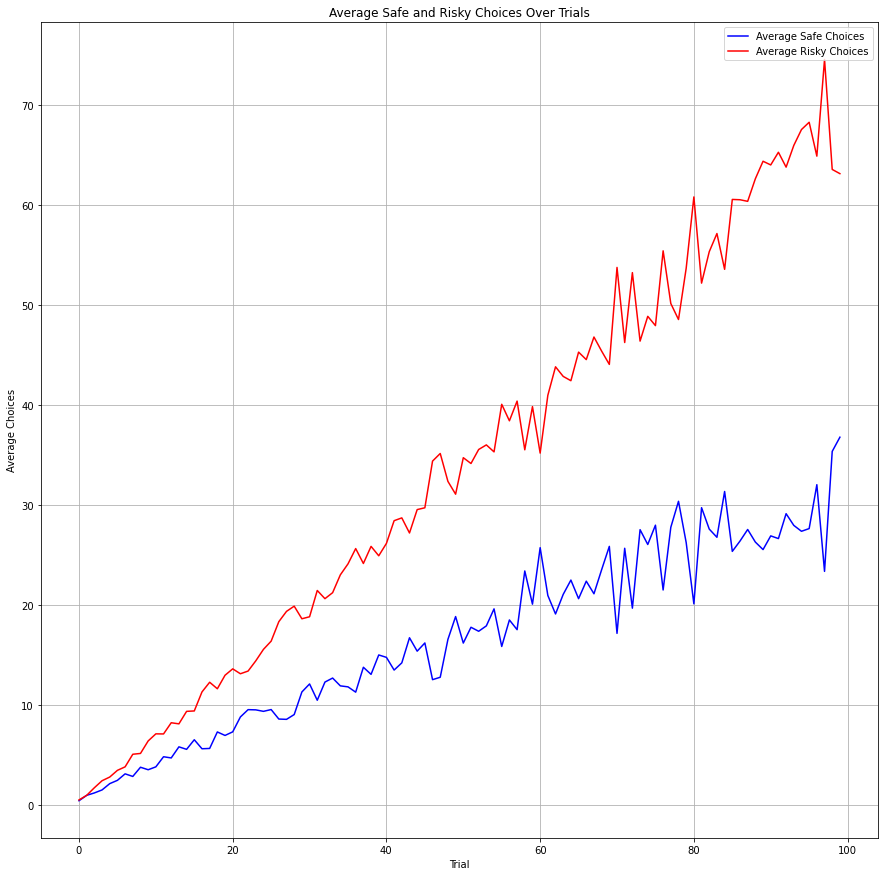

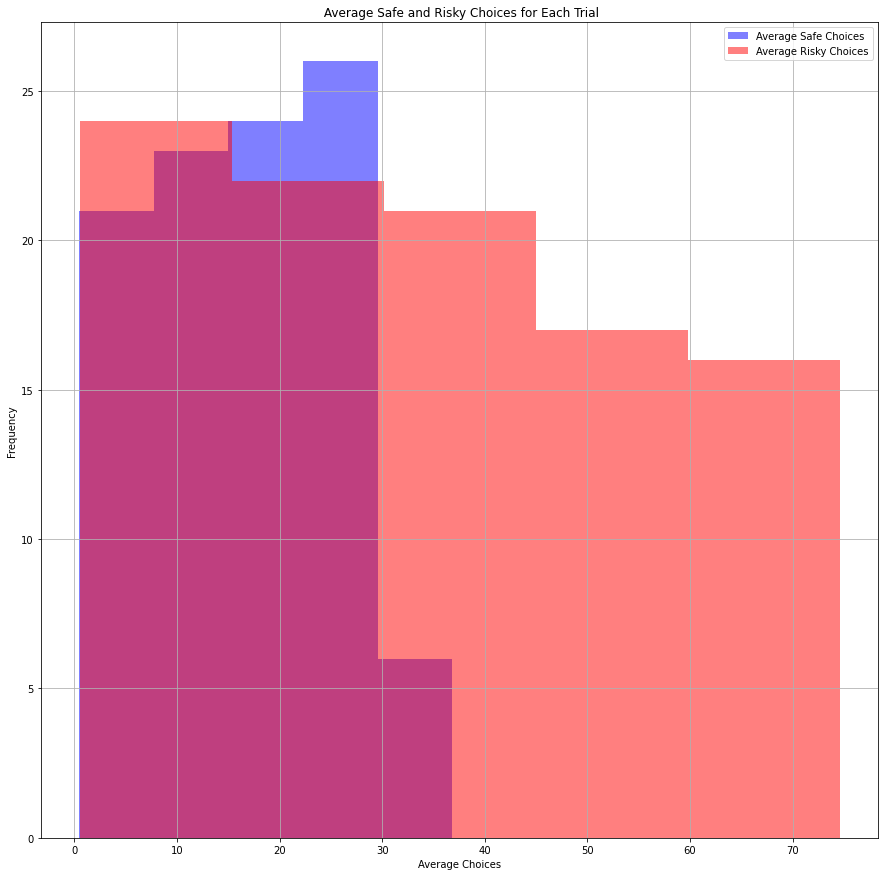

In [8]:
plt.figure(figsize=(15, 15))
plt.plot(range(trials), average_counts_A, label='Average Safe Choices', color='blue')
plt.plot(range(trials), average_counts_B, label='Average Risky Choices', color='red')
plt.xlabel('Trial')
plt.ylabel('Average Choices')
plt.title('Average Safe and Risky Choices Over Trials')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()


# Create a histogram
plt.figure(figsize=(15, 15))
plt.hist(average_counts_A, bins=5, alpha=0.5, label='Average Safe Choices', color='blue')
plt.hist(average_counts_B, bins=5, alpha=0.5, label='Average Risky Choices', color='red')
plt.xlabel('Average Choices')
plt.ylabel('Frequency')
plt.title(' Average Safe and Risky Choices for Each Trial')
plt.legend(loc='upper right')
plt.grid(True)

# Show the histogram
plt.show()






